In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
#Load Dataset
data = pd.read_csv('/content/drive/MyDrive/joki/fenny/data_stroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [98]:
# Pengecekan Data
print("Informasi Dataset:")
print(data.info())
print("\nJumlah Missing Values:")
print(data.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Jumlah Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_dis

In [99]:
#Menghapus kolom id karena tidak relevan
data.drop(columns=['id'], inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [101]:
# Pastikan tidak ada spasi ekstra di nama kolom
data.columns = data.columns.str.lower().str.strip()

In [102]:
# Mengubah values kolom kategorik menjadi lowercase dan tidak ada spasi ekstra
data['gender'] = data['gender'].str.lower().str.strip()
data['work_type'] = data['work_type'].str.lower().str.strip()
data['ever_married'] = data['ever_married'].str.lower().str.strip()
data['residence_type'] = data['residence_type'].str.lower().str.strip()
data['smoking_status'] = data['smoking_status'].str.lower().str.strip()

In [103]:
# Check unique values in the identified categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
unique_values = {col: data[col].dropna().unique()[:10] for col in categorical_columns}  # Display up to 10 unique values per column
unique_values

{'gender': array(['male', 'female', 'other'], dtype=object),
 'ever_married': array(['yes', 'no'], dtype=object),
 'work_type': array(['private', 'self-employed', 'govt_job', 'children', 'never_worked'],
       dtype=object),
 'residence_type': array(['urban', 'rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'unknown'],
       dtype=object)}

In [104]:
# Mengecek kolom yang berisi missing values
data.columns[data.isnull().any()]

Index(['bmi'], dtype='object')

In [105]:
# Menangani missing values dengan diisi nilai median
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

<ipython-input-105-c6d0a8b700dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [106]:
#drop baris yang berisi 'other' di kolom gender
data.drop(data[data["gender"] == "other"].index, inplace=True)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [108]:
#cek data duplikat
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5105,False
5106,False
5107,False
5108,False


In [109]:
#Outliers
def outlier_function(data, col_name):
    first_quartile = np.percentile(data[col_name], 25)
    third_quartile = np.percentile(data[col_name], 75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile + (1.5 * IQR)
    lower_limit = first_quartile - (1.5 * IQR)
    outlier_count = 0

    for value in data[col_name].tolist():
        if value < lower_limit or value > upper_limit:
            outlier_count += 1
    return lower_limit, upper_limit, outlier_count

In [110]:
from scipy.stats.mstats import winsorize
def winsorize_outliers(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menghitung proporsi data yang outlier
    lower_prop = (data[col_name] < lower_limit).mean()  # Proporsi data di bawah lower_limit
    upper_prop = (data[col_name] > upper_limit).mean()  # Proporsi data di atas upper_limit

    # Pastikan proporsi berada di antara 0 dan 1
    lower_prop = min(max(lower_prop, 0), 1)
    upper_prop = min(max(upper_prop, 0), 1)

    # Melakukan Winsorization dengan proporsi
    data[col_name] = winsorize(data[col_name], limits=(lower_prop, upper_prop))

    return data

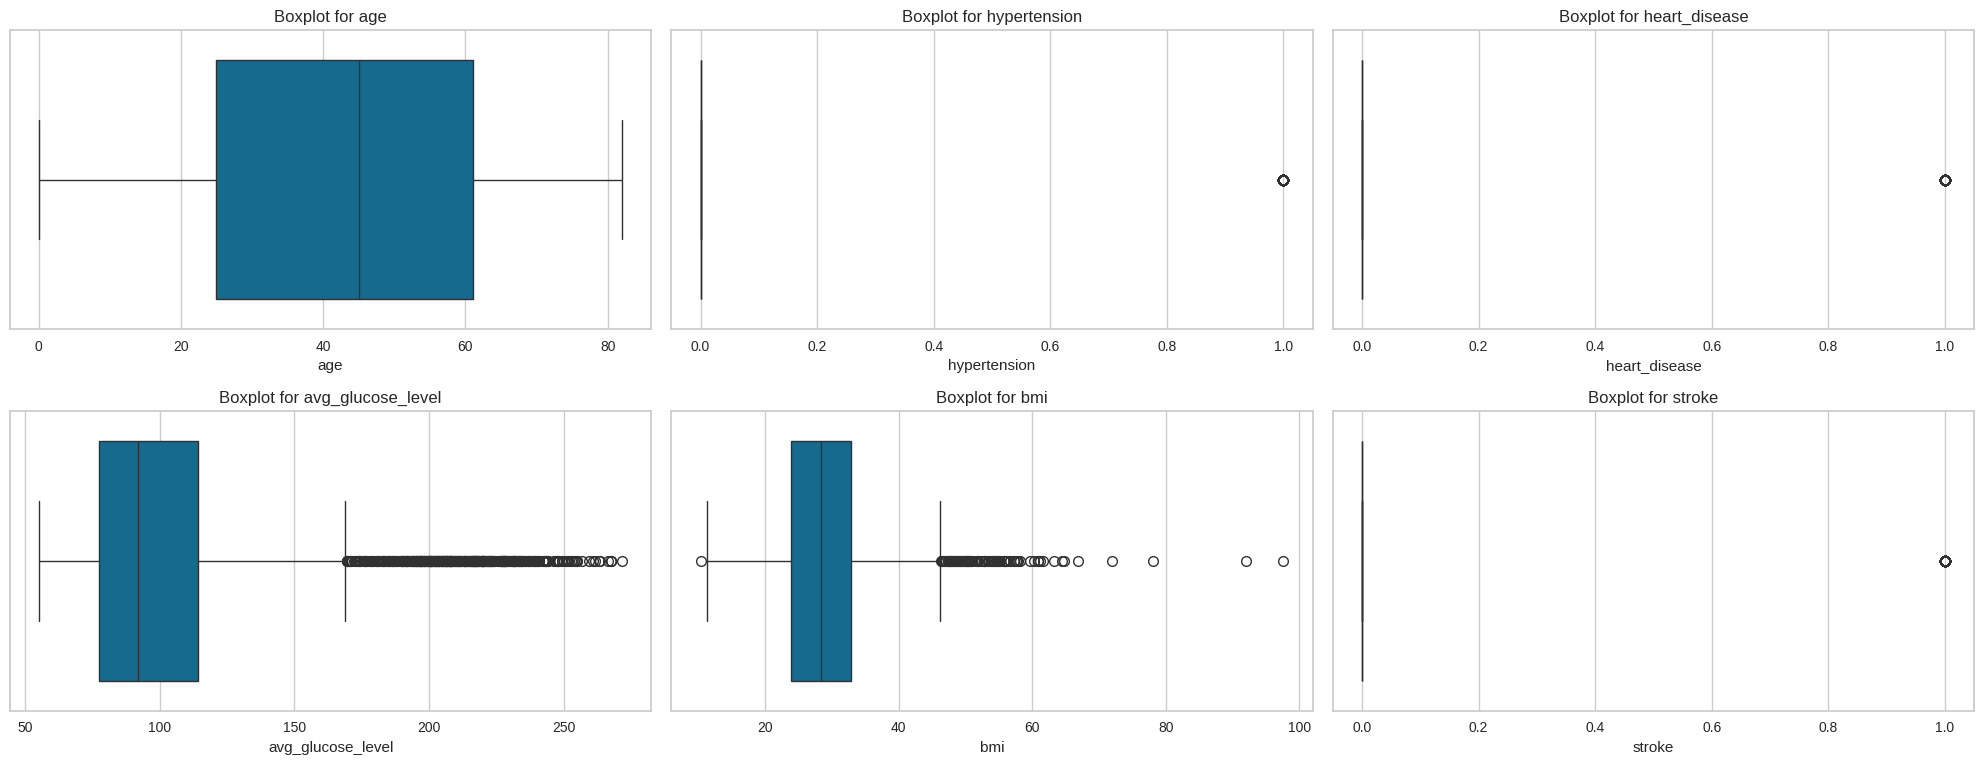

In [111]:
#visualisasi Outliers
outlier_columns = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20,15))

for i, outlier_column in enumerate(outlier_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[outlier_column])
    plt.title(f"Boxplot for {outlier_column}")

plt.tight_layout()
plt.show()

In [112]:
#menangani Outliers
numerics = data.select_dtypes(include=['float64'])
for column in numerics.columns:
    # Mengecek apakah ada outlier
    if outlier_function(data, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data, column)[2], column))
        # Melakukan Winsorization untuk kolom yang mengandung outlier
        data = winsorize_outliers(data, column)
        print(f"Outliers in {column} have been winsorized.")

There are 627 outliers in avg_glucose_level
Outliers in avg_glucose_level have been winsorized.
There are 126 outliers in bmi
Outliers in bmi have been winsorized.


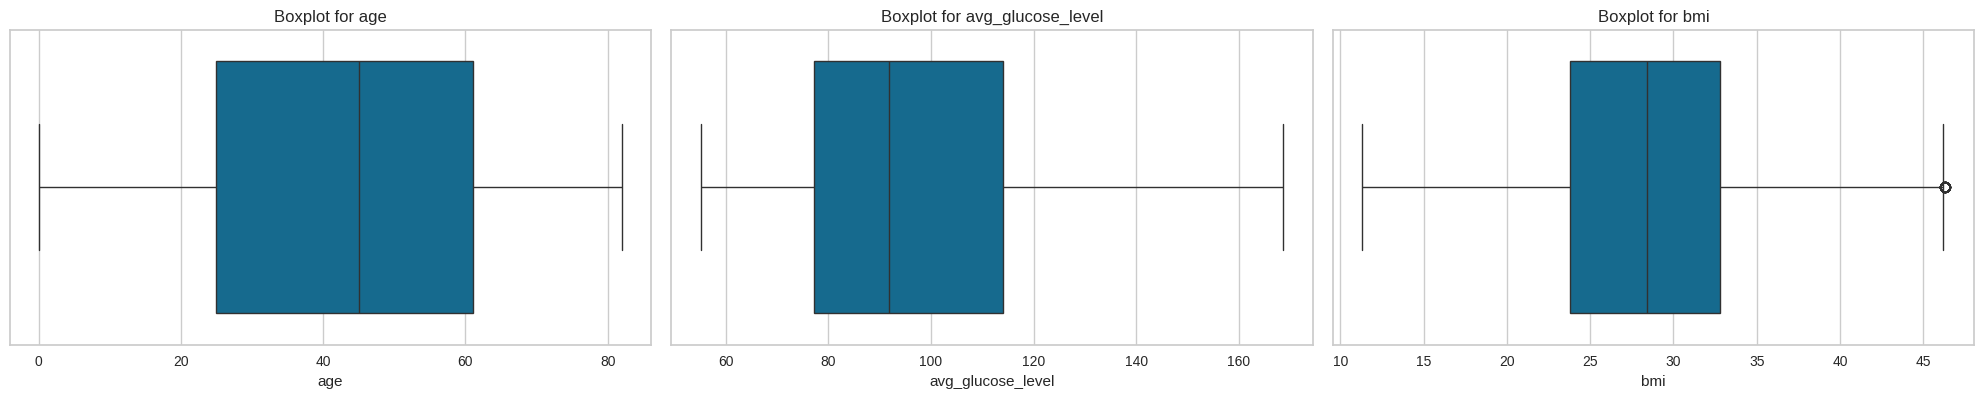

There are 125 outliers in bmi


In [113]:
#cek outliers setelah ditangani
outlier_columns = data.select_dtypes(include=['float64'])

plt.figure(figsize=(20,15))

for i, column in enumerate(outlier_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot for {column}")
plt.tight_layout()
plt.show()


numerics = data.select_dtypes(include=['float64'])
for column in numerics.columns:
  if outlier_function(numerics, column)[2] > 0:
    print("There are {} outliers in {}".format(outlier_function(data, column)[2], column))

In [114]:
data.shape

(5109, 11)

In [115]:
data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,100.904772,28.723046,0.048738
std,22.613575,0.296633,0.226084,33.041818,7.119595,0.215340
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,168.680000,46.300000,1.000000


In [116]:
#cek kolom yang akan di label encoding
for x in data.select_dtypes(include='object'):
    print(data[x].value_counts())

gender
female    2994
male      2115
Name: count, dtype: int64
ever_married
yes    3353
no     1756
Name: count, dtype: int64
work_type
private          2924
self-employed     819
children          687
govt_job          657
never_worked       22
Name: count, dtype: int64
residence_type
urban    2596
rural    2513
Name: count, dtype: int64
smoking_status
never smoked       1892
unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


In [117]:
#sebelum encoding
data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,168.68,36.600000,formerly smoked,1
1,female,61.0,0,0,yes,self-employed,rural,168.68,28.893237,never smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,female,49.0,0,0,yes,private,urban,168.68,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,168.68,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,female,80.0,1,0,yes,private,urban,83.75,28.893237,never smoked,0
5106,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never smoked,0
5107,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never smoked,0
5108,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly smoked,0


In [118]:
# Encoding Fitur Kategorikal
label_encoder = LabelEncoder()
lab_enc_data= data.loc[:,['gender','ever_married','residence_type','work_type','smoking_status']]
for x in lab_enc_data.columns:
    lab_enc_data[x]=label_encoder.fit_transform(lab_enc_data[x])
#
for x in lab_enc_data.columns:
    data[x]=lab_enc_data[x]
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,168.68,36.600000,0,1
1,0,61.0,0,0,1,4,0,168.68,28.893237,1,1
2,1,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,3,1,168.68,34.400000,2,1
4,0,79.0,1,0,1,4,0,168.68,24.000000,1,1


In [119]:
#setelah encoding
data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,168.68,36.600000,0,1
1,0,61.0,0,0,1,4,0,168.68,28.893237,1,1
2,1,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,3,1,168.68,34.400000,2,1
4,0,79.0,1,0,1,4,0,168.68,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,3,1,83.75,28.893237,1,0
5106,0,81.0,0,0,1,4,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,4,0,82.99,30.600000,1,0
5108,1,51.0,0,0,1,3,0,166.29,25.600000,0,0


In [120]:
# Pengecekan Data
print("Informasi Dataset:")
print(data.info())
print("\nJumlah Missing Values:")
print(data.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB
None

Jumlah Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_l

In [121]:
data.describe().T

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,count,mean,std,min,25%,50%,75%,max
gender,5109.0,0.413975,0.492592,0.00,0.00,0.00,1.00,1.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
ever_married,5109.0,0.656293,0.474991,0.00,0.00,1.00,1.00,1.00
work_type,5109.0,2.495400,1.278638,0.00,1.00,3.00,3.00,4.00
residence_type,5109.0,0.508123,0.499983,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,5109.0,100.904772,33.041818,55.12,77.24,91.88,114.09,168.68
bmi,5109.0,28.723046,7.119595,11.30,23.80,28.40,32.80,46.30
smoking_status,5109.0,1.585829,1.092404,0.00,1.00,1.00,3.00,3.00


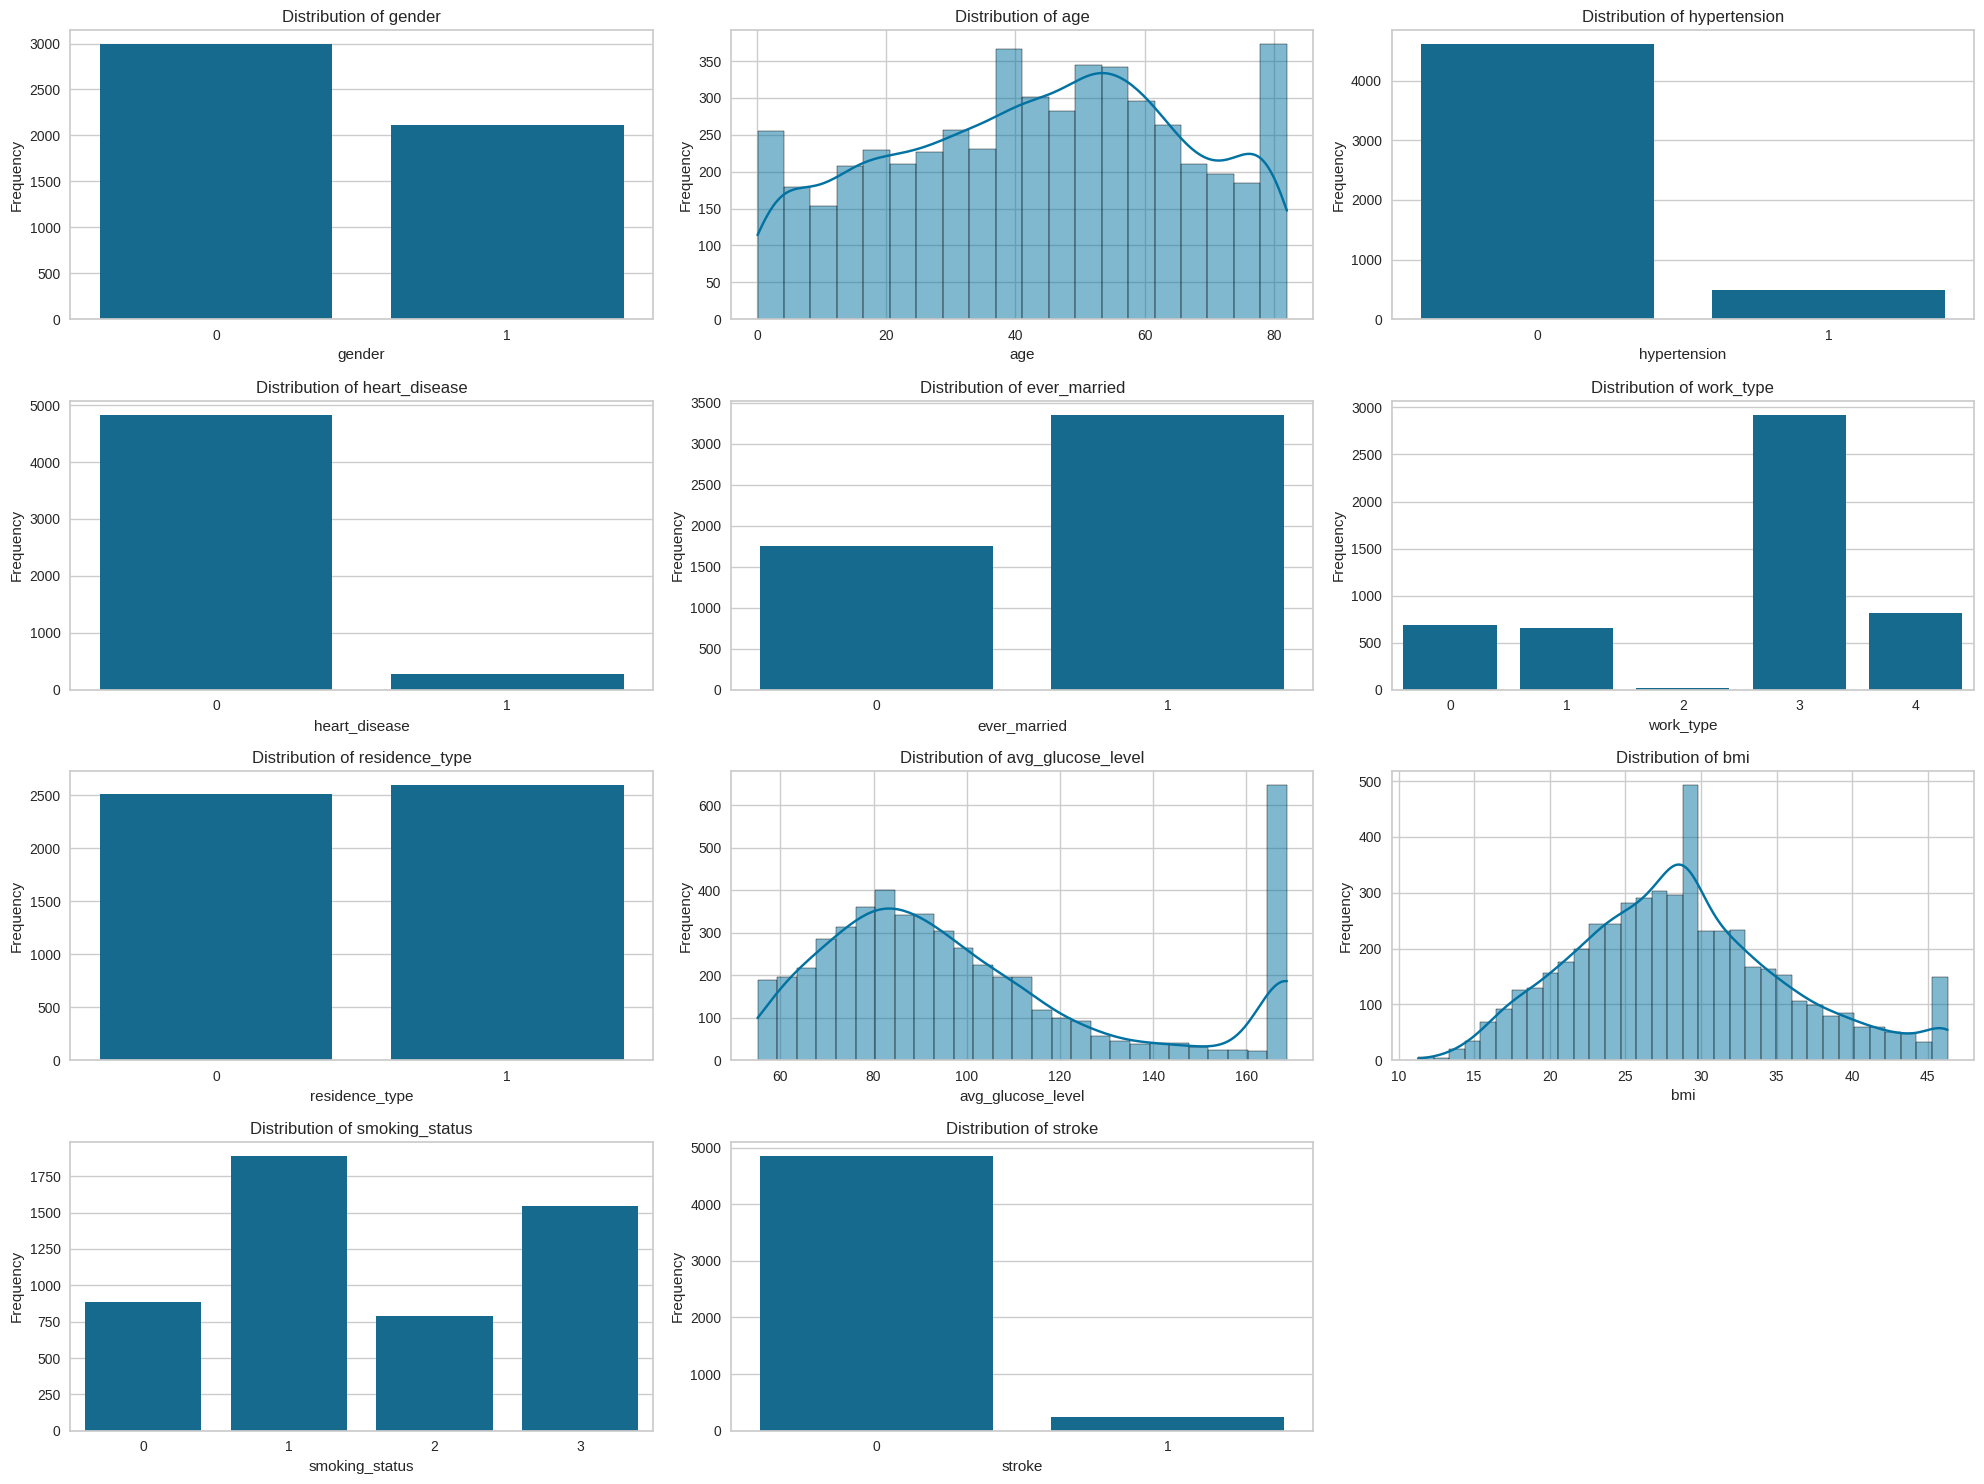

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    if data[feature].dtype == 'object' or data[feature].nunique() < 10:
        sns.countplot(x=feature, data=data)
    else:
        sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

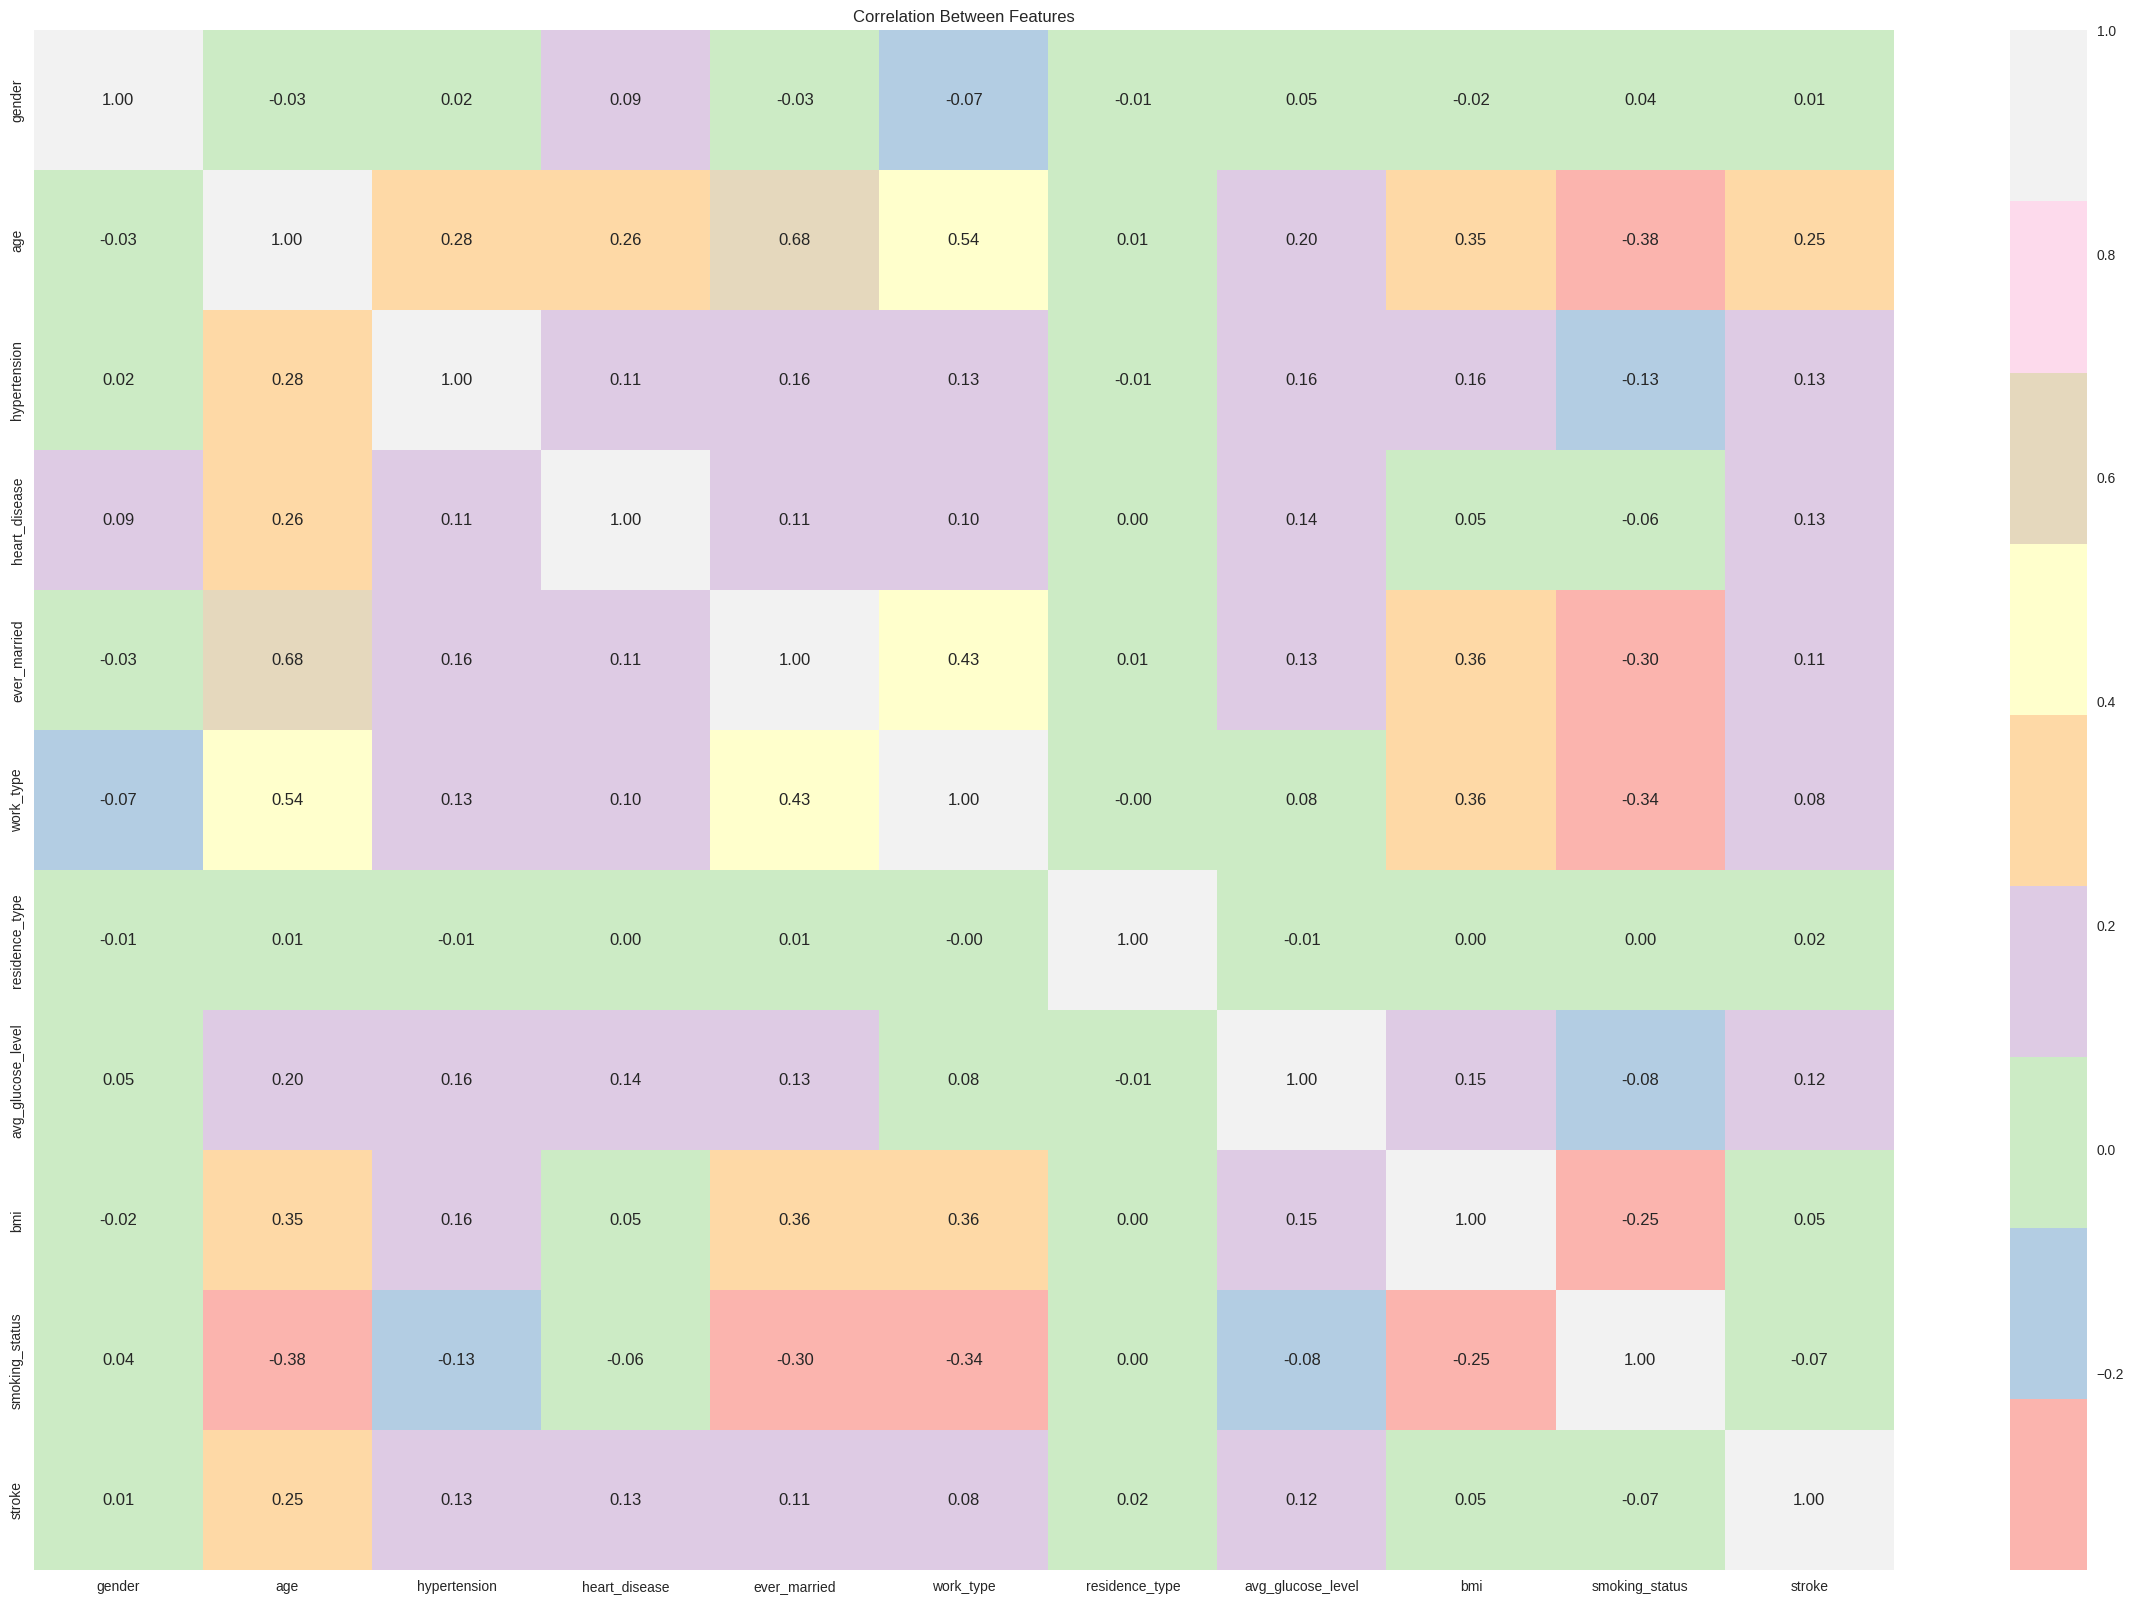

In [123]:
#multivariate analysis
corr_matrix= data.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(corr_matrix,cmap="Pastel1", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

In [124]:
#mengubah nama kolom stroke menjadi label
data = data.rename(columns = {"stroke":"Label"})
data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,Label
0,1,67.0,0,1,1,3,1,168.68,36.600000,0,1
1,0,61.0,0,0,1,4,0,168.68,28.893237,1,1
2,1,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,3,1,168.68,34.400000,2,1
4,0,79.0,1,0,1,4,0,168.68,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,3,1,83.75,28.893237,1,0
5106,0,81.0,0,0,1,4,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,4,0,82.99,30.600000,1,0
5108,1,51.0,0,0,1,3,0,166.29,25.600000,0,0


In [125]:
# inisialisasi MinMax Scaler (Normalisasi Data)
scaler = MinMaxScaler()

data[['age (norm)', 'avg_glucose_level (norm)', 'bmi (norm)']] = scaler.fit_transform(
    data[['age', 'avg_glucose_level', 'bmi']]
)
data.drop(columns=['age', 'avg_glucose_level', 'bmi'], inplace=True)
data

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,Label,age (norm),avg_glucose_level (norm),bmi (norm)
0,1,0,1,1,3,1,0,1,0.816895,1.000000,0.722857
1,0,0,0,1,4,0,1,1,0.743652,1.000000,0.502664
2,1,0,1,1,3,0,1,1,0.975586,0.447341,0.605714
3,0,0,0,1,3,1,2,1,0.597168,1.000000,0.660000
4,0,1,0,1,4,0,1,1,0.963379,1.000000,0.362857
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,3,1,1,0,0.975586,0.252113,0.502664
5106,0,0,0,1,4,1,1,0,0.987793,0.617119,0.820000
5107,0,0,0,1,4,0,1,0,0.426270,0.245421,0.551429
5108,1,0,0,1,3,0,0,0,0.621582,0.978954,0.408571


In [126]:
data.to_csv('/content/drive/MyDrive/joki/fenny/data_stroke_cleaned_02.csv', index=False)

In [127]:
data = pd.read_csv('/content/drive/MyDrive/joki/fenny/data_stroke_cleaned_02.csv')
data

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,Label,age (norm),avg_glucose_level (norm),bmi (norm)
0,1,0,1,1,3,1,0,1,0.816895,1.000000,0.722857
1,0,0,0,1,4,0,1,1,0.743652,1.000000,0.502664
2,1,0,1,1,3,0,1,1,0.975586,0.447341,0.605714
3,0,0,0,1,3,1,2,1,0.597168,1.000000,0.660000
4,0,1,0,1,4,0,1,1,0.963379,1.000000,0.362857
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,1,0,1,3,1,1,0,0.975586,0.252113,0.502664
5105,0,0,0,1,4,1,1,0,0.987793,0.617119,0.820000
5106,0,0,0,1,4,0,1,0,0.426270,0.245421,0.551429
5107,1,0,0,1,3,0,0,0,0.621582,0.978954,0.408571


In [128]:
# Seleksi Fitur dan Target
X = data.drop(columns=['Label'])  # Semua kolom kecuali target
y = data['Label']  # Target klasifikasi

In [129]:
print("\nFitur yang Digunakan untuk Pemodelan:")
print(X.columns)


Fitur yang Digunakan untuk Pemodelan:
Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'residence_type', 'smoking_status', 'age (norm)',
       'avg_glucose_level (norm)', 'bmi (norm)'],
      dtype='object')


In [130]:
X.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'residence_type', 'smoking_status', 'age (norm)',
       'avg_glucose_level (norm)', 'bmi (norm)'],
      dtype='object')

<Axes: >

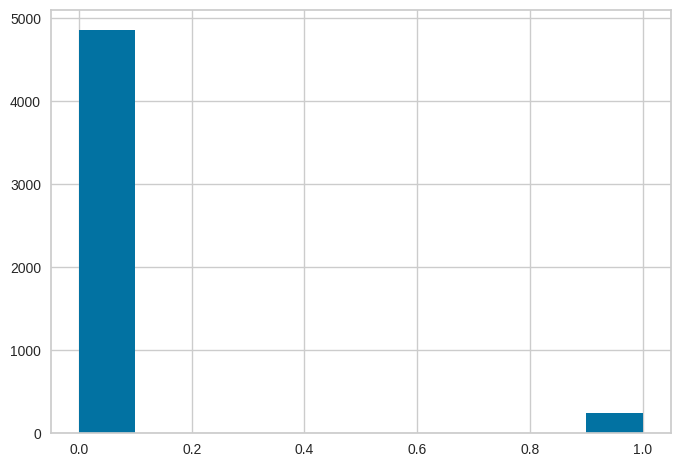

In [131]:
y.hist()

In [132]:
# SMOTE method for class imbalance,
from imblearn.combine import SMOTEENN
oversample = SMOTEENN(random_state=42)
X_sm, y_sm = oversample.fit_resample(X,y)
print('Data shapes before oversampling were {0} and {1}'.format(X.shape, y.shape))
print('Data shapes after oversampling are {0} and {1}'.format(X_sm.shape, y_sm.shape))
y_sm.value_counts()

Data shapes before oversampling were (5109, 10) and (5109,)
Data shapes after oversampling are (8257, 10) and (8257,)


,count
Label,
1,4372
0,3885


In [133]:
#resampled data train_test_split
resX_train, resX_test, resy_train, resy_test = train_test_split(X_sm, y_sm, train_size= 0.7,
                                                               random_state=42)

print(resX_train.shape, resX_test.shape)
print(resy_train.shape, resy_test.shape)

(5779, 10) (2478, 10)
(5779,) (2478,)


<Axes: >

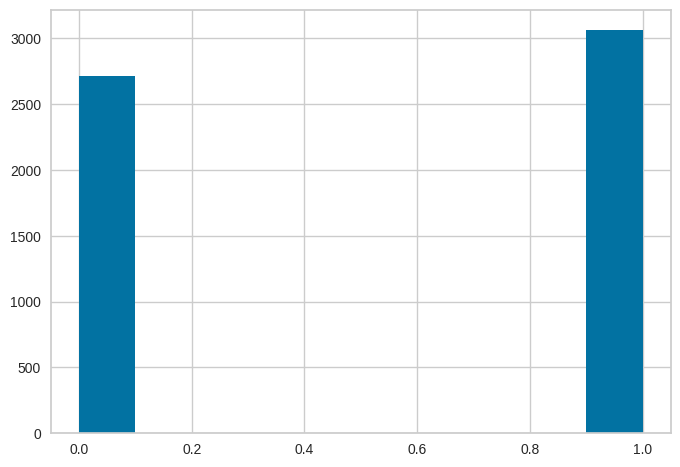

In [134]:
resy_train.hist()

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [136]:
# Membuat model KNN
knn = KNeighborsClassifier()  # K=5, default KNN
knn.fit(resX_train, resy_train)

KNeighborsClassifier()

In [137]:
# Prediksi
y_pred = knn.predict(resX_test)

In [138]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(resy_test, y_pred))
print("\nClassification Report:")
print(classification_report(resy_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(resy_test, y_pred))

Confusion Matrix:
[[1034  136]
 [  28 1280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      1170
           1       0.90      0.98      0.94      1308

    accuracy                           0.93      2478
   macro avg       0.94      0.93      0.93      2478
weighted avg       0.94      0.93      0.93      2478


Accuracy Score:
0.933817594834544


In [139]:
from sklearn.model_selection import GridSearchCV

k_values= range(1, 21)
param_grid = {"n_neighbors": k_values, "weights": ['uniform', "distance"]}

KNN_grid = KNeighborsClassifier()
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='f1')
KNN_grid_model.fit(resX_train, resy_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [140]:
print(('Best Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), (KNN_grid_model.best_params_))
print("--------------------------------------------------------------------------------------------------------------------")
print(('Best Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), (KNN_grid_model.best_estimator_))

('Best Parameters of GridSearchCV for KNN Model:\x1b', 'blue') {'n_neighbors': 1, 'weights': 'uniform'}
--------------------------------------------------------------------------------------------------------------------
('Best Estimator of GridSearchCV for KNN Model:\x1b', 'blue') KNeighborsClassifier(n_neighbors=1)


In [141]:
# Membuat model KNN setelah hyperparameter tuning
knn_2 = KNeighborsClassifier(n_neighbors=1)  # K=1, hasil nilai K dari gridsearchCV
knn_2.fit(resX_train, resy_train)

KNeighborsClassifier(n_neighbors=1)

In [142]:
# Prediksi
y_pred1 = knn_2.predict(resX_test)

In [143]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(resy_test, y_pred1))
print("\nClassification Report:")
print(classification_report(resy_test, y_pred1))
print("\nAccuracy Score:")
print(accuracy_score(resy_test, y_pred1))

Confusion Matrix:
[[1110   60]
 [  17 1291]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1170
           1       0.96      0.99      0.97      1308

    accuracy                           0.97      2478
   macro avg       0.97      0.97      0.97      2478
weighted avg       0.97      0.97      0.97      2478


Accuracy Score:
0.9689265536723164


In [144]:
import pickle as pkl
pkl.dump(knn_2, open("/content/drive/MyDrive/joki/fenny/KNN_model_02.pkl", "wb"))

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5109.0,0.413975,0.492592,0.0,0.000000,0.000000,1.000000,1.0
hypertension,5109.0,0.097475,0.296633,0.0,0.000000,0.000000,0.000000,1.0
heart_disease,5109.0,0.054022,0.226084,0.0,0.000000,0.000000,0.000000,1.0
ever_married,5109.0,0.656293,0.474991,0.0,0.000000,1.000000,1.000000,1.0
work_type,5109.0,2.495400,1.278638,0.0,1.000000,3.000000,3.000000,4.0
residence_type,5109.0,0.508123,0.499983,0.0,0.000000,1.000000,1.000000,1.0
smoking_status,5109.0,1.585829,1.092404,0.0,1.000000,1.000000,3.000000,3.0
Label,5109.0,0.048738,0.215340,0.0,0.000000,0.000000,0.000000,1.0
age (norm),5109.0,0.526733,0.276045,0.0,0.304199,0.548340,0.743652,1.0
avg_glucose_level (norm),5109.0,0.403177,0.290964,0.0,0.194787,0.323706,0.519285,1.0


In [146]:
import pickle as pkl
pkl.dump(scaler, open("/content/drive/MyDrive/joki/fenny/scaler_02.pkl", "wb"))

In [147]:
print('Model K-Nearest Neighbors :')
print (f'Train Accuracy - : {knn.score(resX_train, resy_train): .3f}')
print (f'Test Accuracy - : {knn.score(resX_test, resy_test): .3f}')

Model K-Nearest Neighbors :
Train Accuracy - :  0.962
Test Accuracy - :  0.934


In [148]:
print('Model K-Nearest Neighbors (K=1) :')
print (f'Train Accuracy - : {knn_2.score(resX_train, resy_train): .3f}')
print (f'Test Accuracy - : {knn_2.score(resX_test, resy_test): .3f}')

Model K-Nearest Neighbors (K=1) :
Train Accuracy - :  1.000
Test Accuracy - :  0.969


In [149]:
from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

In [150]:
def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
    print("Negative Class Results")
    precision = (tp / (tp + fp))
    recall =  (tp  / (tp + fn))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

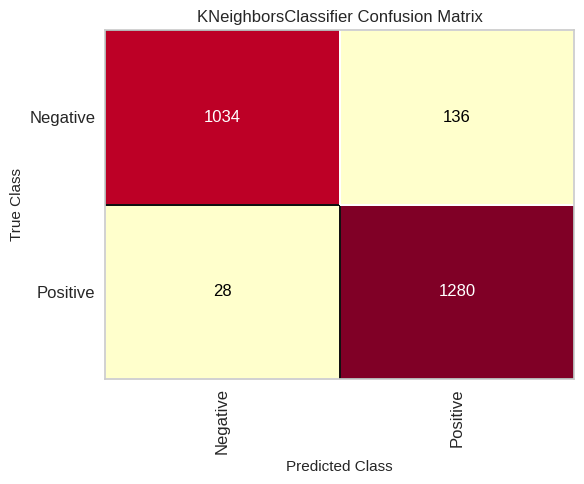

In [151]:
vis_conf(knn, resX_test, resy_test)

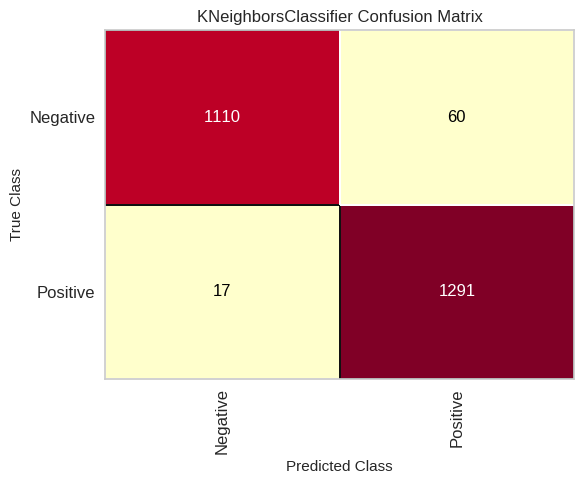

In [152]:
vis_conf(knn_2, resX_test, resy_test)